# Interface with Dynamic Simulator ANDES

In [1]:
import andes
import ams

In [2]:
import matplotlib
%matplotlib inline

In [3]:
ams.__version__

'0.6.4.post116.dev0+g1d95839'

In [4]:
ams.config_logger(stream_level=10)

In [5]:
sp = ams.load(ams.get_case('ieee14/ieee14.xlsx'),
              setup=True,
              )

Input format guessed as xlsx.
Parsing input file "/Users/jinningwang/Documents/work/ams/ams/cases/ieee14/ieee14.xlsx"...
Input file parsed in 0.3761 seconds.
Adjust bus index to start from 0.
System set up in 0.0028 seconds.


In [6]:
sa = sp.to_andes(setup=False,
                 addfile=andes.get_case('ieee14/ieee14_wt3.xlsx'),
                 overwrite=True,
                 no_keep=True,
                 no_output=True,
                 )

sa.setup()

JSON file written to "ieee14.json"
System convert to ANDES in 0.1007 seconds, saved as "ieee14.json".
Converted file is removed. Set "no_keep=False" to keep it.
Addfile format guessed as xlsx.
Parsing additional file "/Users/jinningwang/Documents/work/mambaforge/envs/ams/lib/python3.9/site-packages/andes/cases/ieee14/ieee14_wt3.xlsx"...
Power flow models exist in the addfile. Only dynamic models will be used.
Adjust IdxParam <GENROU.gen>
Adjust IdxParam <REGCA1.gen>
Addfile parsed in 0.0801 seconds.


True

In [7]:
sa.PFlow.run()

True

In [8]:
sa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle Toggler_1>: Line.Line_1 status changed to 0 at t=1.0 sec.
<Toggle Toggler_2>: Line.Line_1 status changed to 1 at t=1.1 sec.


True

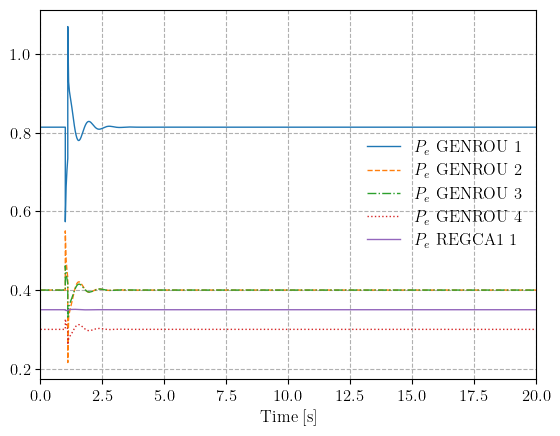

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: xlabel='Time [s]'>)

In [9]:
sa.TDS.plt.plot([sa.GENROU.Pe, sa.REGCA1.Pe], grid='both')